In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3

%matplotlib inline

In [91]:
# Create a connection to the SQLite database
conn = sqlite3.connect('../Data/db/fraude_detection_warehouse.db')

In [92]:
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,2022-11-13,depôt,1.398501e+06,réussie,1,Bamenda
1,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,2020-04-08,retrait,4.249703e+06,réussie,0,Garoua
2,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,2018-03-20,transfert,9.459800e+06,réussie,1,Yaoundé
3,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,2021-09-24,retrait,3.524150e+06,réussie,0,Bamenda
4,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,2023-03-23,depôt,2.293050e+06,réussie,0,Douala


In [93]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  object 
 1   customer_id       100000 non-null  object 
 2   device_id         100000 non-null  object 
 3   transaction_date  100000 non-null  object 
 4   transaction_type  100000 non-null  object 
 5   amount            100000 non-null  float64
 6   status            100000 non-null  object 
 7   is_fraud          100000 non-null  int64  
 8   location          100000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [94]:
transactions.describe(include="all")

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
count,100000,100000,100000,100000,100000,1.000000e+05,100000,100000.000000,100000
unique,100000,9999,63147,2192,3,NaN,2,NaN,102
top,dd2bffc0808f4b96a77e5cf112fca9b6,21a876f1acbd4fbe8730b40c19416a1c,203a839d-8e9d-4d4a-80c1-66d735ba6639,2022-12-07,depôt,NaN,réussie,NaN,Garoua
freq,1,25,7,71,50087,NaN,90029,NaN,11371
mean,NaN,NaN,NaN,NaN,NaN,5.578606e+06,NaN,0.564270,NaN
std,NaN,NaN,NaN,NaN,NaN,3.509040e+06,NaN,0.495855,NaN
min,NaN,NaN,NaN,NaN,NaN,2.092133e+02,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.647397e+06,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.324787e+06,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.040386e+06,NaN,1.000000,NaN


changing date type

In [95]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    100000 non-null  object        
 1   customer_id       100000 non-null  object        
 2   device_id         100000 non-null  object        
 3   transaction_date  100000 non-null  datetime64[ns]
 4   transaction_type  100000 non-null  object        
 5   amount            100000 non-null  float64       
 6   status            100000 non-null  object        
 7   is_fraud          100000 non-null  int64         
 8   location          100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 6.9+ MB


### transaction_type

<Axes: xlabel='transaction_type', ylabel='count'>

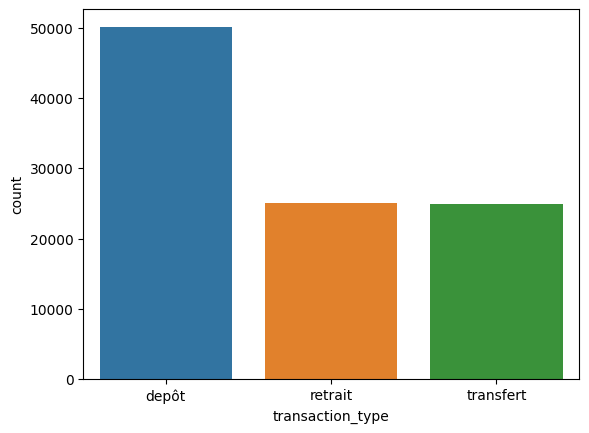

In [96]:
sns.countplot(transactions, x="transaction_type", hue='transaction_type')

In [97]:
transactions.transaction_type.value_counts().sort_values()

transaction_type
transfert    24916
retrait      24997
depôt        50087
Name: count, dtype: int64

In [98]:
length = transactions.shape[0]
# create dataframe percentage of transaction type
proportion = pd.DataFrame(transactions['transaction_type'].value_counts(normalize=True)*100)
proportion

,proportion
transaction_type,
depôt,50.087
retrait,24.997
transfert,24.916


### transaction amount

In [99]:
# transaction amount by transaction type
pd.DataFrame(transactions.groupby('transaction_type').amount.aggregate(['mean', 'median']))

,mean,median
transaction_type,,
depôt,5.579943e+06,5.326212e+06
retrait,5.556882e+06,5.274670e+06
transfert,5.597712e+06,5.367440e+06


In [100]:
transfert = transactions[transactions.transaction_type == 'transfert']
depot = transactions[transactions.transaction_type == 'depôt']
retrait = transactions[transactions.transaction_type == 'retrait']
type_list = [transfert, depot, retrait]


<Axes: xlabel='amount', ylabel='Count'>

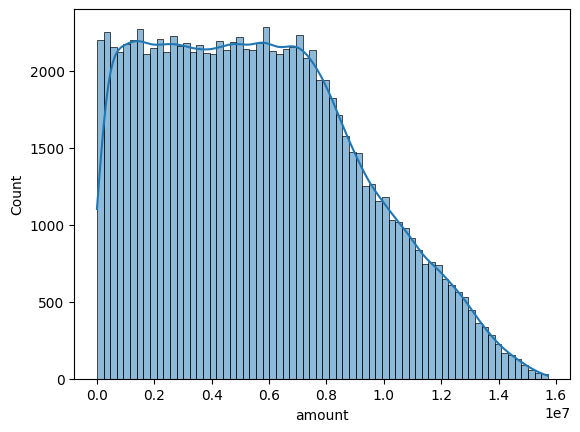

In [101]:
sns.histplot(transactions, x="amount", kde=True)

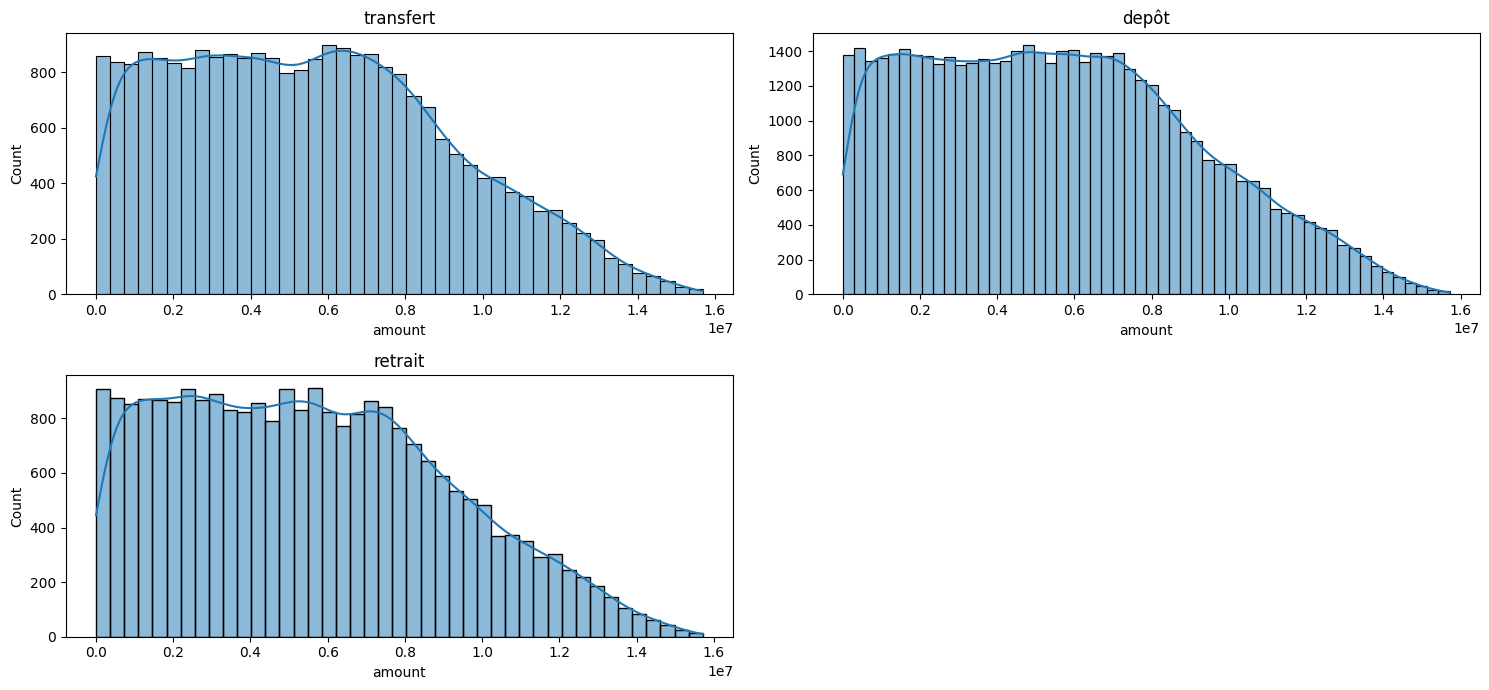

In [102]:
plt.figure(figsize=(15,7))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.histplot(value, x='amount', kde=True)
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

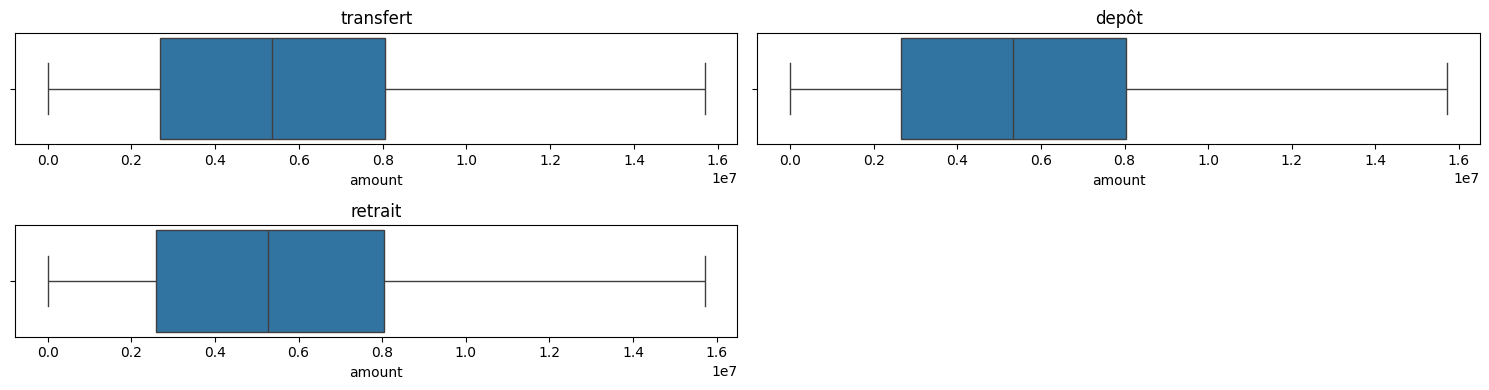

In [103]:
plt.figure(figsize=(15,4))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.boxplot(value, x='amount')
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

### Analyse temporelle

In [104]:
transactions['month'] = pd.to_datetime(transactions['transaction_date'].dt.strftime('%Y-%m'))
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions['month_number'] = transactions['transaction_date'].dt.month
transactions['year'] = transactions['transaction_date'].dt.year

In [105]:
transactions_copy = transactions.set_index('transaction_date')
transactions_copy.head()

,transaction_id,customer_id,device_id,transaction_type,amount,status,is_fraud,location,month,week,month_number,year
transaction_date,,,,,,,,,,,,
2022-11-13,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,depôt,1.398501e+06,réussie,1,Bamenda,2022-11-01,45,11,2022
2020-04-08,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,retrait,4.249703e+06,réussie,0,Garoua,2020-04-01,15,4,2020
2018-03-20,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,transfert,9.459800e+06,réussie,1,Yaoundé,2018-03-01,12,3,2018
2021-09-24,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,retrait,3.524150e+06,réussie,0,Bamenda,2021-09-01,38,9,2021
2023-03-23,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,depôt,2.293050e+06,réussie,0,Douala,2023-03-01,12,3,2023


Montant de transaction par jour

In [106]:
transactions_per_day = pd.DataFrame(transactions_copy.groupby('transaction_date').amount.aggregate("mean")).reset_index()
fig = px.line(transactions_per_day, x='transaction_date', y='amount', title='transactions_per_day amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par mois

In [107]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("month").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='month', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par an

In [112]:
transactions_per_year = pd.DataFrame(transactions_copy.groupby("year").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='year', y='amount', title='transactions_per_year amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par jour

In [109]:
transactions_per_day_nbr = pd.DataFrame(transactions_copy.groupby("transaction_date").transaction_id.count()).reset_index()
fig = px.line(transactions_per_day_nbr, x='transaction_date', y='transaction_id', title='transactions_per_day_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par mois

In [110]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("month").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='month', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par an

In [111]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("year").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='year', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)